___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# VAR(p)
## Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.
> However, in this case a bi-directional relationship may be more suitable: an increase in $I_t$ will lead to an increase in $C_t$ and vice versa.<br>An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

Aside from investigating multivariate time series, vector autoregression is used for
* <a href='https://www.statsmodels.org/devel/vector_ar.html#impulse-response-analysis'>Impulse Response Analysis</a> which involves the response of one variable to a sudden but temporary change in another variable
* <a href='https://www.statsmodels.org/devel/vector_ar.html#forecast-error-variance-decomposition-fevd'>Forecast Error Variance Decomposition (FEVD)</a> where the proportion of the forecast variance of one variable is attributed to the effect of other variables
* <a href='https://www.statsmodels.org/devel/vector_ar.html#dynamic-vector-autoregressions'>Dynamic Vector Autoregressions</a> used for estimating a moving-window regression for the purposes of making forecasts throughout the data sample

### Formulation
We've seen that an autoregression AR(p) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

A $K$-dimensional VAR model of order $p$, denoted <strong>VAR(p)</strong>, considers each variable $y_K$ in the system.<br>

For example, The system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>

and the system of equations for a 3-dimensional VAR(2) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>

The general steps involved in building a VAR model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

Recall that to fit a SARIMAX model we passed one field of data as our <em>endog</em> variable, and another for <em>exog</em>. With VAR, both fields will be passed in as <em>endog</em>.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VAR.html'>vector_ar.var_model.VAR</a></strong><font color=black>(endog[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fit VAR(p) process and do lag order selection<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>vector_ar.var_model.VARResults</a></strong><font color=black>(endog, …[, …])</font>&nbsp;&nbsp;Estimate VAR(p) process with fixed number of lags<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.dynamic.DynamicVAR.html'>vector_ar.dynamic.DynamicVAR</a></strong><font color=black>(data[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Estimates time-varying vector autoregression (VAR(p)) using equation-by-equation least squares</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/vector_ar.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Vector_autoregression'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregression</font>
</div>

### Perform standard imports and load dataset
For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).<br>
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR#, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

### Inspect the data

In [3]:
df = df.join(sp)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [4]:
df = df.dropna()
df.shape

(252, 2)

### Plot the source data

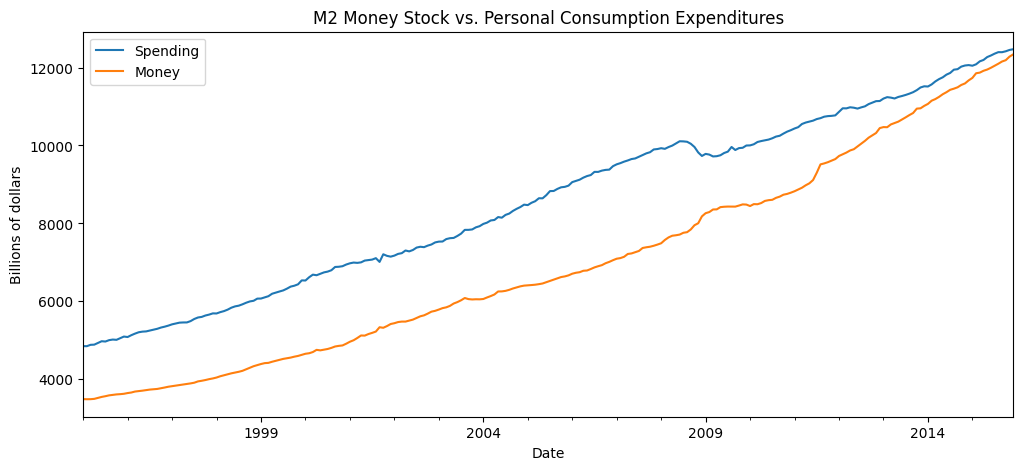

In [5]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

## Test for stationarity, perform any necessary transformations

In [6]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df['Money'],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
adf_test(df['Spending'], title='Spending')

Augmented Dickey-Fuller Test: Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Neither variable is stationary, so we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests. It's advisable to save transformed values in a new DataFrame, as we'll need the original when we later invert the transormations and evaluate the model.

In [9]:
df_transformed = df.diff()

In [10]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Money'], title='MoneyFirstDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingFirstDiff')

Augmented Dickey-Fuller Test: MoneyFirstDiff
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: SpendingFirstDiff
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Since Money is not yet stationary, we'll apply second order differencing to both series so they retain the same number of observations

In [11]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Money'], title='MoneySecondDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingSecondDiff')

Augmented Dickey-Fuller Test: MoneySecondDiff
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingSecondDiff
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [13]:
len(df_transformed)

250

### Train/test split
It will be useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [14]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [15]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


## VAR Model Order Selection
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [16]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.178610495220896
BIC:  14.266409486135709

Order = 2
AIC:  13.955189367163705
BIC:  14.101961901274958

Order = 3
AIC:  13.849518291541038
BIC:  14.055621258341116

Order = 4
AIC:  13.827950574458281
BIC:  14.093744506408875

Order = 5
AIC:  13.78730034460964
BIC:  14.113149468980652

Order = 6
AIC:  13.799076756885809
BIC:  14.185349048538068

Order = 7
AIC:  13.797638727913972
BIC:  14.244705963046671



In [17]:
model = VAR(train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.178610495220896
BIC:  14.266409486135709

Order = 2
AIC:  13.955189367163705
BIC:  14.101961901274958

Order = 3
AIC:  13.849518291541038
BIC:  14.055621258341116

Order = 4
AIC:  13.827950574458281
BIC:  14.093744506408875

Order = 5
AIC:  13.78730034460964
BIC:  14.113149468980652

Order = 6
AIC:  13.799076756885809
BIC:  14.185349048538068

Order = 7
AIC:  13.797638727913972
BIC:  14.244705963046671



The VAR(5) model seems to return the lowest combined scores.<br>
Just to verify that both variables are included in the model we can run <tt>.endog_names</tt>

In [18]:
model.endog_names

['Money', 'Spending']

## Fit the VAR(5) Model

In [19]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 25, Jun, 2025
Time:                     23:35:05
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

## Predict the next 12 values
Unlike the VARMAX model we'll use in upcoming sections, the VAR <tt>.forecast()</tt> function requires that we pass in a lag order number of previous observations as well. Unfortunately this forecast tool doesn't provide a DateTime index - we'll have to do that manually.

In [20]:
lag_order = results.k_ar
lag_order

5

In [21]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [22]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [23]:
idx = pd.date_range('1/1/2015', periods=12, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['Money2d','Spending2d'])
df_forecast

,Money2d,Spending2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [24]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [25]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [26]:
df_forecast

,Money2d,Spending2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


## Plot the results
The VARResults object offers a couple of quick plotting tools:

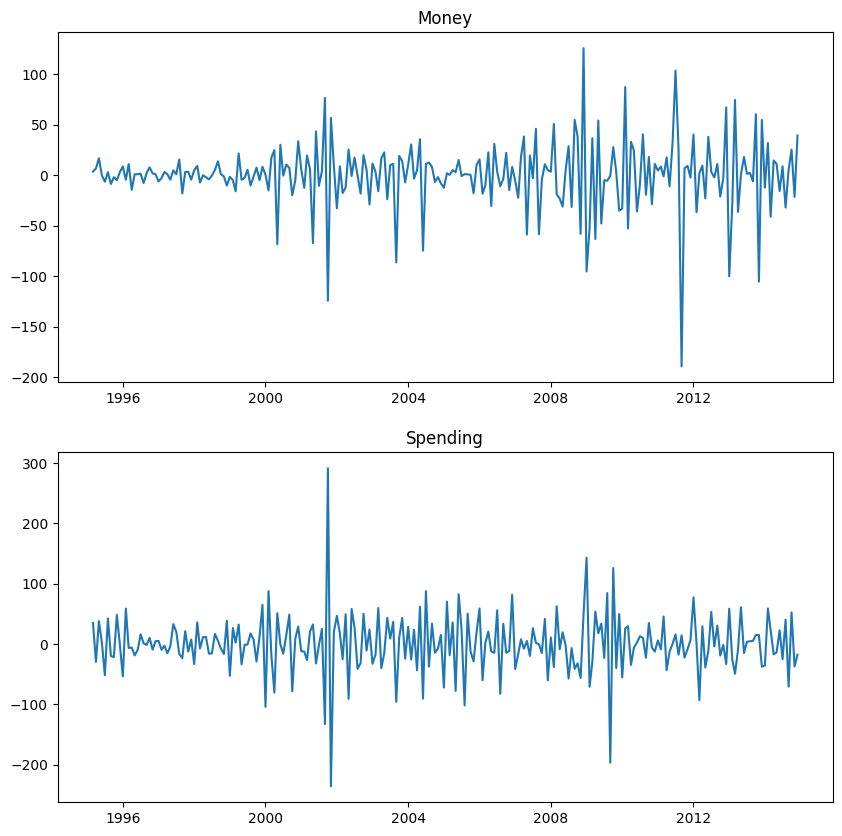

In [27]:
results.plot();

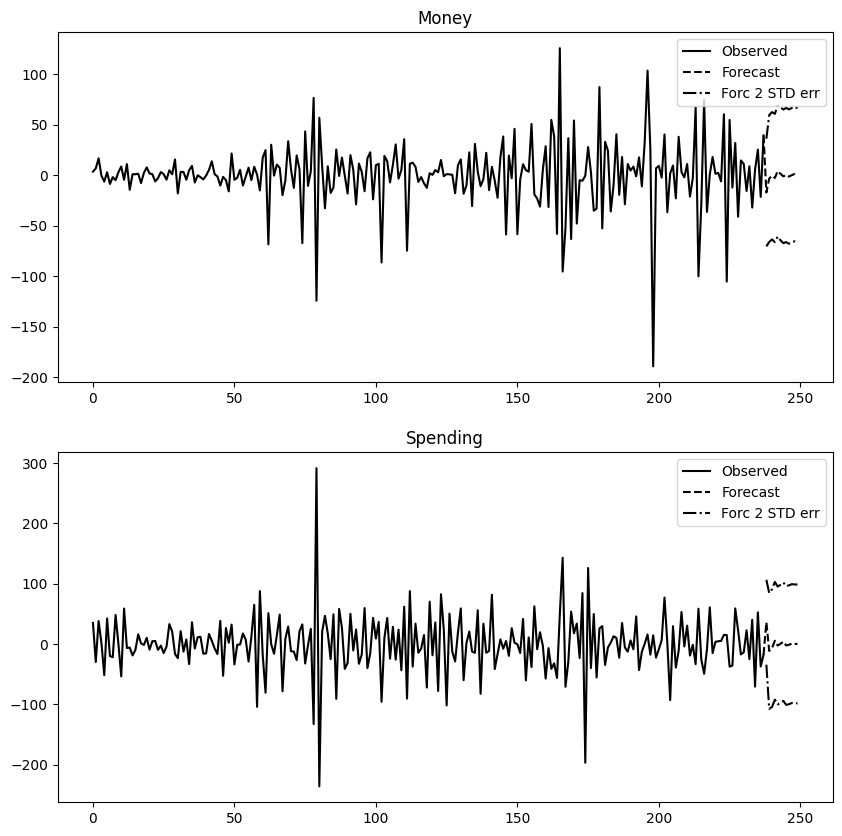

In [28]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

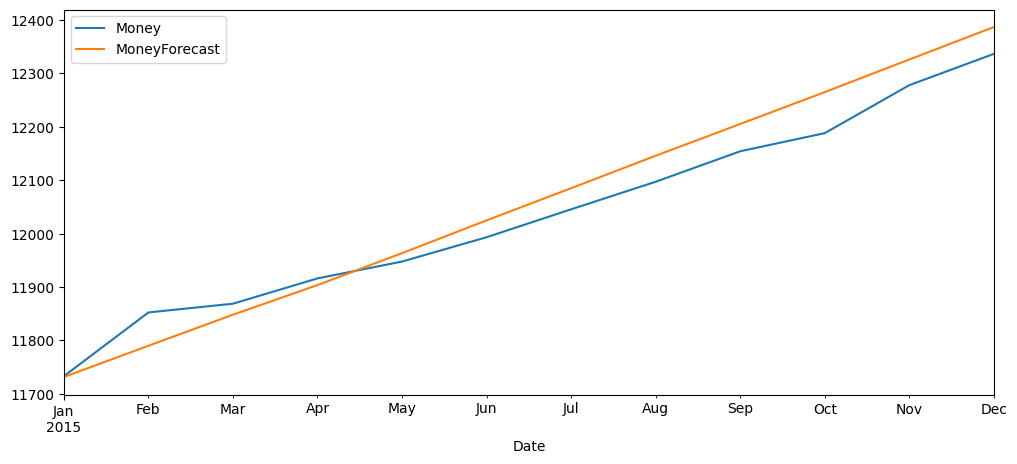

In [29]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

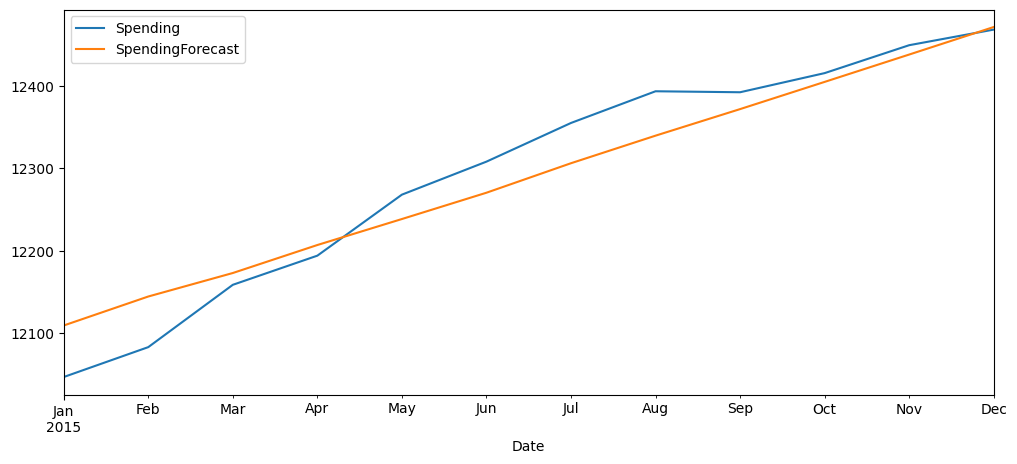

In [30]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [31]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 43.710


In [32]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 37.001


## Let's compare these results to individual AR(5) models

In [35]:
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg

### Money

In [39]:
modelM = AutoReg(train['Money'], lags=5)
AR5fit1 = modelM.fit()
print(f'Lag: {len(AR5fit1.ar_lags)}')
print(f'Coefficients:\n{AR5fit1.params}')

Lag: 5
Coefficients:
const       0.467296
Money.L1   -0.609867
Money.L2   -0.470648
Money.L3   -0.231296
Money.L4   -0.315501
Money.L5   -0.129869
dtype: float64


In [40]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR5fit1.predict(start=start, end=end, dynamic=False),columns=['Money'])

In [41]:
z1

,Money
2015-01-01,-17.119701
2015-02-01,-11.528475
2015-03-01,9.827790
2015-04-01,-5.836863
2015-05-01,2.339541
2015-06-01,5.375022
2015-07-01,-4.165296
2015-08-01,0.501917
2015-09-01,0.898255
2015-10-01,-1.352987


### Invert the Transformation, Evaluate the Forecast

In [42]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [43]:
z1

,Money,Money1d,MoneyForecast
2015-01-01,-17.119701,61.480299,11731.580299
2015-02-01,-11.528475,49.951824,11781.532123
2015-03-01,9.827790,59.779614,11841.311736
2015-04-01,-5.836863,53.942751,11895.254487
2015-05-01,2.339541,56.282292,11951.536779
2015-06-01,5.375022,61.657314,12013.194093
2015-07-01,-4.165296,57.492019,12070.686112
2015-08-01,0.501917,57.993936,12128.680048
2015-09-01,0.898255,58.892191,12187.572238
2015-10-01,-1.352987,57.539203,12245.111442


In [44]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VAR(5) RMSE: {RMSE1:.3f}')
print(f'Money  AR(5) RMSE: {RMSE3:.3f}')

Money VAR(5) RMSE: 43.710
Money  AR(5) RMSE: 34.394


## Personal Spending

In [45]:
modelS = AutoReg(train['Spending'], lags=5)
AR5fit2 = modelS.fit()
print(f'Lag: {len(AR5fit2.ar_lags)}')
print(f'Coefficients:\n{AR5fit2.params}')

Lag: 5
Coefficients:
const          0.184280
Spending.L1   -0.913581
Spending.L2   -0.677940
Spending.L3   -0.453659
Spending.L4   -0.272830
Spending.L5   -0.161200
dtype: float64


In [46]:
z2 = pd.DataFrame(AR5fit2.predict(start=start, end=end, dynamic=False),columns=['Spending'])
z2

,Spending
2015-01-01,30.641068
2015-02-01,-1.792151
2015-03-01,-9.189819
2015-04-01,6.747310
2015-05-01,-4.427224
2015-06-01,-0.626697
2015-07-01,3.493390
2015-08-01,-0.933378
2015-09-01,-0.926789
2015-10-01,0.963593


### Invert the Transformation, Evaluate the Forecast

In [47]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [48]:
z2

,Spending,Spending1d,SpendingForecast
2015-01-01,30.641068,41.241068,12103.241068
2015-02-01,-1.792151,39.448917,12142.689985
2015-03-01,-9.189819,30.259098,12172.949083
2015-04-01,6.747310,37.006408,12209.955491
2015-05-01,-4.427224,32.579184,12242.534675
2015-06-01,-0.626697,31.952487,12274.487162
2015-07-01,3.493390,35.445877,12309.933039
2015-08-01,-0.933378,34.512499,12344.445539
2015-09-01,-0.926789,33.585710,12378.031249
2015-10-01,0.963593,34.549303,12412.580551


In [50]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')
print(f'Spending  AR(5) RMSE: {RMSE4:.3f}')

Spending VAR(5) RMSE: 37.001
Spending  AR(5) RMSE: 34.261


<strong>CONCLUSION:</strong> It looks like the VAR(5) model did <em>not</em> do better than the individual AR(5) models. That's ok - we know more than we did before. In the next section we'll look at VARMA and see if the addition of a $q$ parameter helps. Great work!